# Practical 5B

This practical is related to Example 1(a). <br> Modify the functions used in Practical 5A to produce the table of PCA results table, scree plot, loading plot and score plot.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import os

We will read in the data file.

In [27]:
# os.chdir('D:/MS0240')

In [28]:
data = pd.read_csv("Chp5Eg1.csv")
data.head()

,Social Class/ No. of children,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,B2,332,428,354,1437,526,247,427
1,W2,293,559,388,1527,567,239,258
2,U2,372,767,562,1948,927,235,433
3,B3,406,563,341,1507,544,324,407
4,W3,386,608,396,1501,558,319,363


In [29]:
data_reduced = data.drop(['Social Class/ No. of children'], axis=1)
data_reduced.head()

,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,332,428,354,1437,526,247,427
1,293,559,388,1527,567,239,258
2,372,767,562,1948,927,235,433
3,406,563,341,1507,544,324,407
4,386,608,396,1501,558,319,363


In [50]:
data_reduced = data.drop(['Social Class/ No. of children'], axis=1)
data_reduced.head()

,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,-1.080043,-1.606935,-0.914640,-1.136449,-1.098235,-0.949823,0.813809
1,-1.457251,-0.914473,-0.708695,-0.909033,-0.933097,-1.018125,-1.540548
2,-0.693162,0.185009,0.345261,0.154769,0.516896,-1.052276,0.897395
3,-0.364313,-0.893329,-0.993384,-0.959569,-1.025736,-0.292417,0.535187
4,-0.557753,-0.655460,-0.660237,-0.974731,-0.969347,-0.335106,-0.077782


In [30]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=7).fit(data_reduced)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_reduced)

## Task 1
The function "pca_results" from Practical 5A is reproduced below. Modify it so as to produce the PCA results table.

In [31]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [32]:
pca_results = pca_results(data_reduced, pca)
pca_results

,Eigenvalue,Explained Variance,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
PC 1,273411.7739,0.8795,0.0685,0.3273,0.3038,0.7555,0.4621,0.0899,-0.0587
PC 2,26158.3319,0.0841,0.5477,0.4201,-0.0886,-0.0894,-0.2810,0.6397,0.1399
PC 3,6724.6013,0.0216,0.4409,-0.3106,-0.3135,0.0558,0.3876,-0.1814,0.6516
PC 4,2130.1585,0.0069,-0.0917,0.6924,0.2342,-0.3624,0.0919,-0.4330,0.3606
PC 5,1963.6940,0.0063,-0.1745,-0.3209,0.6954,0.0386,-0.2490,0.2406,0.5115
PC 6,380.5415,0.0012,0.6781,-0.1663,0.4698,-0.1162,-0.0744,-0.3759,-0.3624
PC 7,96.4218,0.0003,-0.0479,-0.0991,0.2060,-0.5212,0.6937,0.4039,-0.1714


To help us decide the number of PCs to keep, one of the guidelines is to refer to the scree plot. We can plot the scree plot using the code below.

<Figure size 640x480 with 0 Axes>

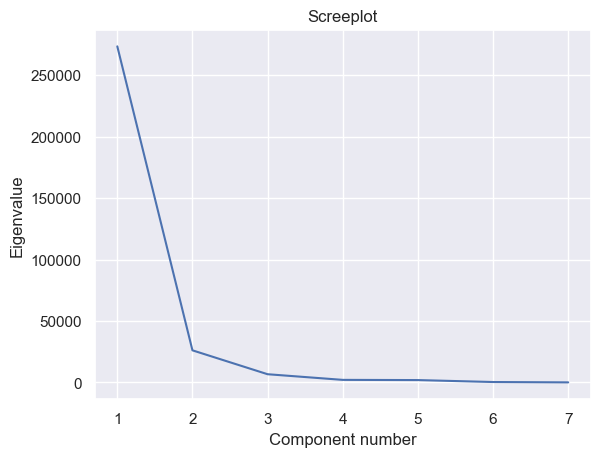

In [33]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

## Task 2
The function "loadingplot" used in Practical 5A is reproduced below. Modify it to produce the loading plot for the first two PCs.

In [34]:
#Extract only the two PCs
pca2 = PCA(n_components=2).fit(data_reduced)
scores2 = pca2.transform(data_reduced)

In [48]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

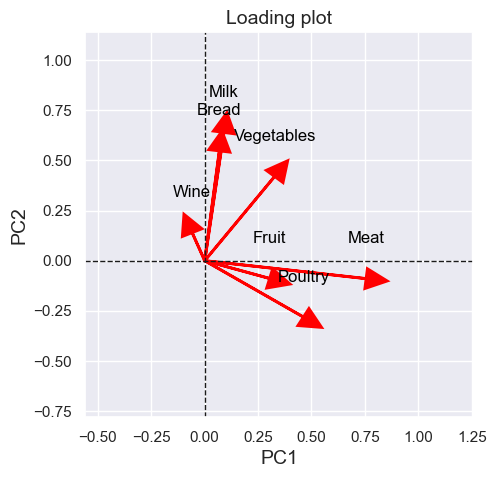

In [49]:
plt.clf
ax2 = loadingplot(data_reduced, pca)  # Students to fill in
plt.show()

## Task 3
The function "scoreplot" from practical 5A is reproduced below, but it is renamed as "scoreplot_label". <br>Modify it to produce the scoreplot with label for each data point that can identify the 12 families.

In [37]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_reduced, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2'])
scores2_notcentred.head()

,PC1,PC2
0,1596.296039,271.671473
1,1742.970714,253.995521
2,2343.122612,252.335396
3,1710.906607,405.201740
4,1745.041843,395.525562


In [51]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=5, height=5, margin=0.5):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores)
    
    # Print text
    text_pos = 30
    for i, v in enumerate(np.array(scores)):
        ax.text(v[0], v[1]+text_pos, data.iloc[i,0], color='black', ha='center', va='center', fontsize=12)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

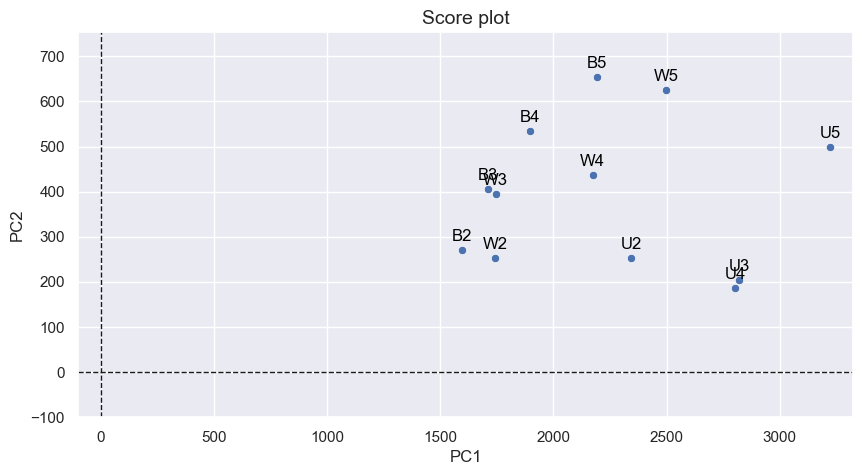

In [52]:
plt.clf
ax3 = scoreplot_label(data, scores2_notcentred, pca, width=10, margin = 100)
plt.show()